# Lab 08-4: LeNet for Image Classification
## Exercise: Image Classification

### Prepare Dataset

170508288/170498071 [==============================] - 13s 0us/step


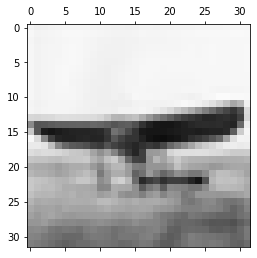

The picture is plane
Train dataset dimensions:  (40000, 32, 32, 3) (40000, 10)


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the original CIFAR10 dataset
# CIFAR10 dataset contains 50000 training images and 10000 test images of 32x32x3 pixels
# Each image contains a small object such as bird, truck, etc...
(X_train_org, y_train_num), (X_test_org, y_test) = tf.keras.datasets.cifar10.load_data()

# Digits data has range of [0,255], which often lead too big exponential values
# so make them normal distribution of [0,1] with the sklearn package, or you can just divide them by 255
X_train = X_train_org / 255
X_test = X_test_org / 255

# Transform Nx1 Y vector to Nx10 answer vector, so that we can perform one-to-all classification
y_train = tf.reshape(tf.one_hot(y_train_num, 10), [-1,10])

# Split training dataset into training and validation
X_val = X_train[40000:50000]
y_val = y_train[40000:50000]

X_train = X_train[:40000]
y_train = y_train[:40000]

# CIFAR10 labels: airplane(0), automobile(1), bird(2), cat(3), deer(4), dog(5), frog(6), horse(7), ship(8), truck(9)
cls_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

n_channels = 3
n_classes = 10

idx = np.random.randint(X_test.shape[0])
plt.matshow(X_test_org[idx])
plt.show()
print('The picture is', cls_names[y_test[idx].item()])

print('Train dataset dimensions: ', X_train.shape, y_train.shape)

### Network Definition with Keras Sequential API<br>
In this exercise you put appropriate layers into the Keras sequential model definition.<br>
Another method to create Keras Sequntial Model is to create an empty model and then add layers.

In [11]:
# model
model = tf.keras.Sequential([
    ### START CODE HERE ###

    # Input Layer
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),

    # Layer 1
    tf.keras.layers.Conv2D(6, 5, strides=(1,1), padding='same', activation='sigmoid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2)),
    
    # Layer 2
    tf.keras.layers.Conv2D(16, 5, strides=(1,1), padding='valid', activation='sigmoid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),

    # Layer 3 to 5
    tf.keras.layers.Dense(120, activation='sigmoid'),
    tf.keras.layers.Dense(84, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax'),

    ### END CODE HERE ###
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_6 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

### Training Model and Showing History

In [12]:
# compile and train
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

# by default, shuffle=True. but shown to make it clear.
history = model.fit(X_train, y_train, batch_size=64, epochs=50, 
                    validation_data=[X_val, y_val], verbose=1, shuffle=True)

Epoch 1/50
625/625 [==============================] - 11s 5ms/step - loss: 1.7400 - acc: 0.3669 - val_loss: 1.5445 - val_acc: 0.4491
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 1.4399 - acc: 0.4821 - val_loss: 1.3839 - val_acc: 0.5066
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 1.3116 - acc: 0.5304 - val_loss: 1.2722 - val_acc: 0.5446
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 1.2290 - acc: 0.5615 - val_loss: 1.2298 - val_acc: 0.5685
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 1.1598 - acc: 0.5865 - val_loss: 1.1875 - val_acc: 0.5829
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 1.1024 - acc: 0.6083 - val_loss: 1.1509 - val_acc: 0.5959
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 1.0505 - acc: 0.6255 - val_loss: 1.1414 - val_acc: 0.6000
Epoch 8/50
625/625 [==============================] - 3s 5ms/step - loss: 1

Evaluate Model

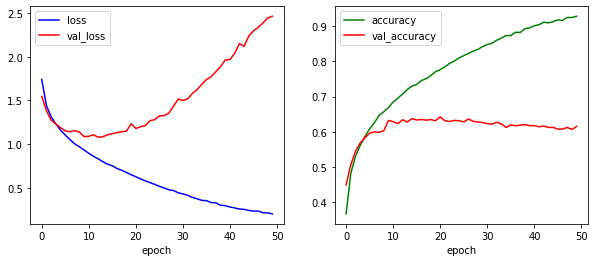

In [13]:
# plot loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [14]:
from sklearn.metrics import accuracy_score

y_prob = model.predict(X_test)
y_pred = tf.math.argmax(y_prob, axis=1)

print(y_test[0:10].reshape(-1))
print(y_pred[0:10].numpy())

accuracy_score(y_pred, y_test)

[3 8 8 0 6 6 1 6 3 1]
[3 8 8 0 4 3 9 6 3 1]


0.603

### Test Model with a Random Sample


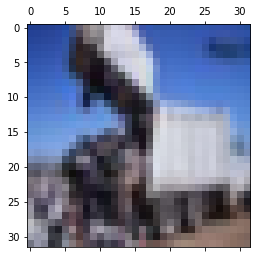

My prediction is truck
Actual image is  truck


In [15]:
idx = np.random.randint(X_test.shape[0])
plt.matshow(X_test_org[idx])
plt.show()

X_in = tf.expand_dims(X_test[idx], 0)

y_prob = model.predict(X_in)
y_pred = np.argmax(y_prob, axis=1)

print('My prediction is ' + cls_names[y_pred[0]])
print('Actual image is  ' + cls_names[y_test[idx].item()])